<a href="https://colab.research.google.com/github/rohandiaz/freelance-clone/blob/ML_Deployment/mapping_job_skill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define a skill mapping for inference
skill_inference = {
    # Programming & Development
    "Programming & Development": [
        "Python", "JavaScript", "Java", "C++", "PHP", "Ruby", "Swift", "Kotlin",
        "C#", "TypeScript", "R", "Go", "Rust", "Scala", "MATLAB", "Perl", "Shell Scripting"
    ],

    # Web Development
    "Web Development": {
        "Frontend Development": [
            "HTML", "CSS", "JavaScript", "React", "Angular", "Vue.js", "Bootstrap",
            "Sass", "Less", "jQuery", "Tailwind CSS", "Foundation"
        ],
        "Backend Development": [
            "Node.js", "Express.js", "Django", "Flask", "Ruby on Rails", "ASP.NET",
            "PHP", "Java", "Spring", "Laravel", "Golang", "Elixir"
        ],
        "Full Stack Development": [
            "MEAN Stack", "MERN Stack", "LAMP Stack", "JAMstack", "Serverless"
        ],
        "Content Management Systems": [
            "WordPress", "Drupal", "Joomla", "Magento", "Shopify", "Wix", "Squarespace",
            "TYPO3", "Sitecore"
        ]
    },

    # Mobile App Development
    "Mobile App Development": {
        "iOS Development": [
            "Swift", "Objective-C", "Xcode", "iOS SDK", "Cocoa Touch", "TestFlight"
        ],
        "Android Development": [
            "Kotlin", "Java", "Android Studio", "Gradle", "Android SDK", "Jetpack"
        ],
        "Cross-Platform Development": [
            "Flutter", "React Native", "Xamarin", "Ionic", "PhoneGap", "NativeScript"
        ]
    },

    # Design & Creative
    "Design & Creative": {
        "Graphic Design": [
            "Adobe Photoshop", "Illustrator", "CorelDRAW", "InDesign", "Adobe XD", "Figma",
            "Logo Design", "Branding", "Typography", "Print Design", "Digital Art", "Infographics"
        ],
        "UI/UX Design": [
            "Wireframing", "Prototyping", "User Experience Design", "User Interface Design",
            "Usability Testing", "Interaction Design", "User Research", "Information Architecture",
            "A/B Testing", "Design Thinking"
        ],
        "Video Production & Editing": [
            "Adobe Premiere Pro", "Final Cut Pro", "After Effects", "Motion Graphics",
            "Video Editing", "Color Correction", "Storyboarding", "Visual Effects", "3D Animation",
            "Sound Design"
        ],
        "3D Modeling & Animation": [
            "Blender", "Maya", "3ds Max", "Cinema 4D", "ZBrush", "SketchUp", "Mudbox",
            "Character Rigging", "Texturing", "Lighting", "Rendering", "Augmented Reality",
            "Virtual Reality", "Motion Capture"
        ]
    },

    # Data Science & Analytics
    "Data Science & Analytics": {
        "Data Analysis": [
            "Python", "R", "SQL", "Excel", "Data Visualization", "Statistical Analysis",
            "ETL", "Data Mining"
        ],
        "Data Visualization": [
            "Tableau", "Power BI", "D3.js", "Matplotlib", "Seaborn", "Plotly"
        ],
        "Machine Learning": [
            "Scikit-Learn", "TensorFlow", "Keras", "PyTorch", "Natural Language Processing",
            "Predictive Modeling", "Algorithm Development", "Deep Learning"
        ],
        "Big Data": [
            "Hadoop", "Spark", "Kafka", "ETL", "Data Warehousing", "NoSQL Databases",
            "Apache Flink"
        ]
    },

    # Digital Marketing
    "Digital Marketing": {
        "Search Engine Optimization (SEO)": [
            "Keyword Research", "On-Page SEO", "Off-Page SEO", "Technical SEO", "Google Analytics",
            "Link Building", "Content Optimization", "Local SEO", "Mobile SEO"
        ],
        "Pay-Per-Click (PPC) Advertising": [
            "Google Ads", "Bing Ads", "Campaign Management", "Ad Copywriting", "Bid Management",
            "Remarketing", "Programmatic Advertising"
        ],
        "Social Media Marketing": [
            "Facebook Ads", "Instagram Ads", "LinkedIn Ads", "Content Strategy", "Community Management",
            "Influencer Marketing", "Social Media Analytics", "Social Media Strategy", "Video Marketing"
        ],
        "Email Marketing": [
            "Campaign Management", "Newsletter Design", "Audience Segmentation", "Automation",
            "A/B Testing", "Email Copywriting", "Email Deliverability"
        ]
    },

    # IT & Networking
    "IT & Networking": {
        "Network Administration": [
            "Network Security", "Firewall Management", "VPNs", "TCP/IP", "Network Troubleshooting",
            "Network Design", "Wireless Networks"
        ],
        "Systems Administration": [
            "Server Management", "Operating Systems", "Virtualization", "Backup Solutions",
            "Patch Management", "ITIL", "Cloud Infrastructure", "Linux Administration"
        ],
        "IT Support": [
            "Technical Support", "Help Desk Management", "Troubleshooting", "Customer Support",
            "ITIL", "Remote Support", "System Upgrades"
        ]
    },

    # Business & Management
    "Business & Management": {
        "Project Management": [
            "Agile", "Scrum", "Lean", "Risk Management", "Project Planning", "Gantt Charts",
            "JIRA", "Trello", "Kanban", "Resource Management"
        ],
        "Business Analysis": [
            "Requirements Gathering", "Process Improvement", "Data Analysis", "SWOT Analysis",
            "Stakeholder Management", "Business Process Modeling"
        ],
        "Strategic Planning": [
            "Business Strategy", "Market Analysis", "Business Development", "Competitive Analysis",
            "Strategic Forecasting", "Strategic Planning Models"
        ]
    },

    # Writing & Translation
    "Writing & Translation": {
        "Copywriting": [
            "Content Creation", "SEO Writing", "Marketing Materials", "Sales Copy", "Blog Writing",
            "Technical Copywriting", "Brand Messaging"
        ],
        "Technical Writing": [
            "Documentation", "User Manuals", "Technical Guides", "API Documentation", "Technical Reports",
            "Knowledge Base Articles"
        ],
        "Localization & Translation": [
            "Translation", "Localization", "Cultural Adaptation", "Multilingual Content",
            "Transcription", "Subtitling", "Voice-over Translation"
        ],
        "Proofreading & Editing": [
            "Grammar Checking", "Content Refinement", "Style Consistency", "Fact-Checking",
            "Copy Editing", "Developmental Editing"
        ]
    },

    # Cloud Computing & DevOps
    "Cloud Computing & DevOps": {
        "Cloud Services": [
            "AWS", "Azure", "Google Cloud", "Cloud Architecture", "Serverless Computing",
            "Cloud Security", "Cloud Migration", "Cloud Storage"
        ],
        "DevOps": [
            "Docker", "Kubernetes", "CI/CD", "Jenkins", "Infrastructure as Code",
            "Terraform", "Configuration Management", "Continuous Integration", "Continuous Deployment"
        ]
    },

    # Cybersecurity
    "Cybersecurity": {
        "Security Analysis": [
            "Penetration Testing", "Vulnerability Assessment", "Threat Analysis", "Risk Assessment",
            "Security Auditing", "Security Architecture", "Compliance Management"
        ],
        "Incident Response": [
            "Incident Handling", "Forensic Analysis", "Breach Management", "Threat Management",
            "Incident Detection", "Response Planning"
        ],
        "Network Security": [
            "Firewall Management", "Intrusion Detection Systems", "Network Monitoring", "VPNs",
            "Cryptography", "Network Access Control"
        ]
    },

    # Audio & Music
    "Audio & Music": {
        "Music Production": [
            "Sound Design", "Audio Editing", "Mixing", "Mastering", "Music Composition",
            "Songwriting", "Music Theory", "Music Arrangement"
        ],
        "Voice Over": [
            "Voice Acting", "Script Reading", "Audio Recording", "Voice Modulation",
            "Character Voices", "Commercial Voiceovers"
        ],
        "Foley & Sound Effects": [
            "Foley Art", "Sound Effect Creation", "Field Recording", "Audio Synchronization",
            "Sound Design for Film", "Video Games Sound Design"
        ]
    },

    # E-commerce
    "E-commerce": {
        "Platform Development": [
            "Shopify", "Magento", "WooCommerce", "BigCommerce", "PrestaShop", "OpenCart",
            "osCommerce", "Ecwid"
        ],
        "Store Management": [
            "Product Listing", "Order Fulfillment", "Customer Service", "Payment Gateways",
            "Shopping Cart Integration", "Inventory Management", "Return Management"
        ],
        "Marketing & Optimization": [
            "E-commerce SEO", "Conversion Rate Optimization", "Affiliate Marketing", "Marketplaces",
            "Dropshipping", "Email Campaigns", "Sales Funnels", "A/B Testing"
        ]
    },

    # Legal Services
    "Legal Services": {
        "Contract Law": [
            "Contract Drafting", "Contract Review", "Negotiation", "Legal Compliance",
            "Commercial Contracts", "Employment Contracts", "Non-Disclosure Agreements"
        ],
        "Intellectual Property": [
            "Trademark Registration", "Patent Filing", "Copyright Law", "IP Portfolio Management",
            "IP Licensing", "IP Litigation"
        ],
        "Corporate Law": [
            "Business Formation", "Corporate Governance", "Mergers & Acquisitions", "Compliance",
            "Corporate Restructuring", "Shareholder Agreements"
        ]
    },

    # Education & Training
    "Education & Training": {
        "Corporate Training": [
            "Leadership Development", "Skills Training", "Employee Onboarding", "Compliance Training",
            "Soft Skills Training", "Technical Training", "Team Building"
        ],
        "Educational Content Creation": [
            "Curriculum Design", "E-Learning Modules", "Interactive Learning Materials", "Video Lectures",
            "Assessments", "Educational Games", "Training Manuals"
        ]
    },

    # Health & Wellness
    "Health & Wellness": {
        "Alternative Medicine": [
            "Acupuncture", "Homeopathy", "Herbal Medicine", "Ayurveda", "Naturopathy",
            "Chiropractic Care", "Traditional Chinese Medicine"
        ],
        "Wellness Coaching": [
            "Life Coaching", "Stress Management", "Health Goals", "Nutrition Planning",
            "Fitness Coaching", "Habit Formation", "Mental Wellness"
        ],
        "Health Consulting": [
            "Health Assessments", "Personal Health Plans", "Chronic Disease Management", "Preventative Health",
            "Health Risk Assessments", "Health Education"
        ]
    },

    # Event Planning & Management
    "Event Planning & Management": {
        "Event Coordination": [
            "Venue Selection", "Logistics Management", "Vendor Coordination", "Event Scheduling",
            "Budget Management", "On-Site Management", "Event Evaluation"
        ],
        "Virtual Events": [
            "Webinars", "Online Workshops", "Virtual Conferences", "Live Streaming Management",
            "Virtual Event Platforms", "Audience Engagement"
        ],
        "Event Marketing": [
            "Event Branding", "Digital Promotions", "Social Media Campaigns", "Influencer Collaborations",
            "Email Campaigns", "Event PR", "Advertising"
        ]
    },

    # Architecture & Engineering
    "Architecture & Engineering": {
        "Architecture": [
            "Building Design", "Urban Planning", "Sustainable Architecture", "Landscape Design",
            "3D Rendering", "CAD Design", "Architectural Visualization"
        ],
        "Engineering": [
            "Civil Engineering", "Structural Engineering", "Mechanical Engineering", "Electrical Engineering",
            "Environmental Engineering", "Project Management", "Engineering Consulting"
        ],
        "Urban Design": [
            "City Planning", "Smart Cities", "Public Space Design", "Urban Infrastructure",
            "Sustainable Development", "Community Planning"
        ]
    },

    # Real Estate Services
    "Real Estate Services": {
        "Real Estate Marketing": [
            "Property Listings", "Virtual Tours", "Real Estate SEO", "Digital Advertising",
            "Social Media Marketing", "Email Campaigns", "Branding"
        ],
        "Property Management": [
            "Tenant Relations", "Lease Management", "Maintenance Coordination", "Rent Collection",
            "Property Inspections", "Compliance", "Financial Reporting"
        ],
        "Real Estate Finance": [
            "Mortgage Brokerage", "Investment Analysis", "Portfolio Management", "Financial Planning",
            "Property Valuation", "Risk Assessment"
        ]
    },

    # Culinary Arts
    "Culinary Arts": {
        "Gastronomy": [
            "Molecular Gastronomy", "International Cuisine", "Food Pairing", "Culinary Innovation",
            "Recipe Development", "Food Presentation"
        ],
        "Food Safety": [
            "HACCP Certification", "Food Safety Standards", "Compliance Audits", "Quality Assurance",
            "Sanitation Practices", "Food Storage"
        ],
        "Culinary Consulting": [
            "Menu Development", "Restaurant Consulting", "Kitchen Design", "Cost Control",
            "Staff Training", "Operational Efficiency"
        ]
    },

    # Personal Development
    "Personal Development": {
        "Career Counseling": [
            "Job Search Strategies", "Resume Writing", "Interview Preparation", "Career Path Guidance",
            "Professional Networking", "Career Assessment"
        ],
        "Skill Enhancement": [
            "Advanced Training Techniques", "Skill Assessments", "Certification Guidance", "Professional Development",
            "Mentoring", "Personal Growth Plans"
        ],
        "Life Coaching": [
            "Goal Setting", "Motivation", "Personal Challenges", "Self-Improvement", "Life Transitions"
        ]
    },

    # Photography
    "Photography": {
        "Commercial Photography": [
            "Product Photography", "Fashion Photography", "Architectural Photography", "Advertising Photography",
            "E-commerce Photography", "Event Photography"
        ],
        "Documentary Photography": [
            "Photo Essays", "Storytelling", "Ethical Considerations", "Field Research",
            "Photojournalism", "Cultural Documentation"
        ],
        "Portrait Photography": [
            "Studio Portraits", "Environmental Portraits", "Family Photography", "Corporate Headshots",
            "Creative Portraiture"
        ]
    },

    # Social Media Management
    "Social Media Management": {
        "Social Media Strategy": [
            "Strategy Development", "Content Calendar", "Audience Analysis", "Engagement Metrics",
            "Brand Voice", "Trend Analysis"
        ],
        "Paid Social Advertising": [
            "Campaign Optimization", "Audience Targeting", "Ad Creation", "Budget Management",
            "Performance Tracking", "Ad Copywriting"
        ],
        "Influencer Marketing": [
            "Influencer Outreach", "Campaign Management", "Performance Tracking", "Contract Negotiation",
            "Influencer Relations", "Brand Partnerships"
        ]
    },

    # Translation & Localization
    "Translation & Localization": {
        "Technical Translation": [
            "Software Localization", "Technical Documentation", "User Guides", "Technical Specifications",
            "Patent Translation", "Engineering Documents"
        ],
        "Multimedia Localization": [
            "Game Localization", "E-Learning Localization", "Software Localization", "Voice-over Recording",
            "Subtitling", "Cultural Adaptation"
        ],
        "Legal Translation": [
            "Contracts", "Legal Documents", "Court Transcripts", "Compliance Materials", "Patent Translation"
        ]
    },

    # Cloud Computing & DevOps
    "Cloud Computing & DevOps": {
        "Cloud Services": [
            "AWS", "Azure", "Google Cloud", "Cloud Architecture", "Serverless Computing",
            "Cloud Security", "Cloud Migration", "Cloud Storage"
        ],
        "DevOps": [
            "Docker", "Kubernetes", "CI/CD", "Jenkins", "Infrastructure as Code",
            "Terraform", "Configuration Management", "Continuous Integration", "Continuous Deployment"
        ]
    },

    # Cybersecurity
    "Cybersecurity": {
        "Security Analysis": [
            "Penetration Testing", "Vulnerability Assessment", "Threat Analysis", "Risk Assessment",
            "Security Auditing", "Security Architecture", "Compliance Management"
        ],
        "Incident Response": [
            "Incident Handling", "Forensic Analysis", "Breach Management", "Threat Management",
            "Incident Detection", "Response Planning"
        ],
        "Network Security": [
            "Firewall Management", "Intrusion Detection Systems", "Network Monitoring", "VPNs",
            "Cryptography", "Network Access Control"
        ]
    },

    # Audio & Music
    "Audio & Music": {
        "Music Production": [
            "Sound Design", "Audio Editing", "Mixing", "Mastering", "Music Composition",
            "Songwriting", "Music Theory", "Music Arrangement"
        ],
        "Voice Over": [
            "Voice Acting", "Script Reading", "Audio Recording", "Voice Modulation",
            "Character Voices", "Commercial Voiceovers"
        ],
        "Foley & Sound Effects": [
            "Foley Art", "Sound Effect Creation", "Field Recording", "Audio Synchronization",
            "Sound Design for Film", "Video Games Sound Design"
        ]
    },

    # E-commerce
    "E-commerce": {
        "Platform Development": [
            "Shopify", "Magento", "WooCommerce", "BigCommerce", "PrestaShop", "OpenCart",
            "osCommerce", "Ecwid"
        ],
        "Store Management": [
            "Product Listing", "Order Fulfillment", "Customer Service", "Payment Gateways",
            "Shopping Cart Integration", "Inventory Management", "Return Management"
        ],
        "Marketing & Optimization": [
            "E-commerce SEO", "Conversion Rate Optimization", "Affiliate Marketing", "Marketplaces",
            "Dropshipping", "Email Campaigns", "Sales Funnels", "A/B Testing"
        ]
    },
    # Legal Services
    "Legal Services": {
        "Contract Law": [
            "Contract Drafting", "Contract Review", "Negotiation", "Legal Compliance",
            "Commercial Contracts", "Employment Contracts", "Non-Disclosure Agreements"
        ],
        "Intellectual Property": [
            "Trademark Registration", "Patent Filing", "Copyright Law", "IP Portfolio Management",
            "IP Licensing", "IP Litigation"
        ],
        "Corporate Law": [
            "Business Formation", "Corporate Governance", "Mergers & Acquisitions", "Compliance",
            "Corporate Restructuring", "Shareholder Agreements"
        ],
        "Family Law": [
            "Divorce Proceedings", "Child Custody", "Prenuptial Agreements", "Adoption",
            "Family Mediation", "Alimony"
        ],
        "Criminal Law": [
            "Defense Strategies", "Plea Bargaining", "Criminal Appeals", "Juvenile Law",
            "Drug Offenses", "White Collar Crime"
        ]
    },

    # Education & Training
    "Education & Training": {
        "Corporate Training": [
            "Leadership Development", "Skills Training", "Employee Onboarding", "Compliance Training",
            "Soft Skills Training", "Technical Training", "Team Building"
        ],
        "Educational Content Creation": [
            "Curriculum Design", "E-Learning Modules", "Interactive Learning Materials", "Video Lectures",
            "Assessments", "Educational Games", "Training Manuals"
        ],
        "Tutoring & Coaching": [
            "Subject-Specific Tutoring", "Test Preparation", "Academic Coaching", "Homework Assistance",
            "Study Skills", "Exam Strategies"
        ]
    },

    # Health & Wellness
    "Health & Wellness": {
        "Alternative Medicine": [
            "Acupuncture", "Homeopathy", "Herbal Medicine", "Ayurveda", "Naturopathy",
            "Chiropractic Care", "Traditional Chinese Medicine"
        ],
        "Wellness Coaching": [
            "Life Coaching", "Stress Management", "Health Goals", "Nutrition Planning",
            "Fitness Coaching", "Habit Formation", "Mental Wellness"
        ],
        "Health Consulting": [
            "Health Assessments", "Personal Health Plans", "Chronic Disease Management", "Preventative Health",
            "Health Risk Assessments", "Health Education"
        ],
        "Mental Health Services": [
            "Counseling", "Therapy", "Cognitive Behavioral Therapy", "Trauma Counseling",
            "Addiction Support", "Mindfulness Training"
        ]
    },

    # Event Planning & Management
    "Event Planning & Management": {
        "Event Coordination": [
            "Venue Selection", "Logistics Management", "Vendor Coordination", "Event Scheduling",
            "Budget Management", "On-Site Management", "Event Evaluation"
        ],
        "Virtual Events": [
            "Webinars", "Online Workshops", "Virtual Conferences", "Live Streaming Management",
            "Virtual Event Platforms", "Audience Engagement"
        ],
        "Event Marketing": [
            "Event Branding", "Digital Promotions", "Social Media Campaigns", "Influencer Collaborations",
            "Email Campaigns", "Event PR", "Advertising"
        ],
        "Wedding Planning": [
            "Venue Selection", "Vendor Coordination", "Wedding Design", "Guest Management",
            "Day-of Coordination", "Budget Management"
        ]
    },

    # Architecture & Engineering
    "Architecture & Engineering": {
        "Architecture": [
            "Building Design", "Urban Planning", "Sustainable Architecture", "Landscape Design",
            "3D Rendering", "CAD Design", "Architectural Visualization"
        ],
        "Engineering": [
            "Civil Engineering", "Structural Engineering", "Mechanical Engineering", "Electrical Engineering",
            "Environmental Engineering", "Project Management", "Engineering Consulting"
        ],
        "Urban Design": [
            "City Planning", "Smart Cities", "Public Space Design", "Urban Infrastructure",
            "Sustainable Development", "Community Planning"
        ],
        "Interior Design": [
            "Space Planning", "Color Theory", "Furniture Design", "Lighting Design",
            "Home Staging", "Commercial Interiors"
        ]
    },

    # Real Estate Services
    "Real Estate Services": {
        "Real Estate Marketing": [
            "Property Listings", "Virtual Tours", "Real Estate SEO", "Digital Advertising",
            "Social Media Marketing", "Email Campaigns", "Branding"
        ],
        "Property Management": [
            "Tenant Relations", "Lease Management", "Maintenance Coordination", "Rent Collection",
            "Property Inspections", "Compliance", "Financial Reporting"
        ],
        "Real Estate Finance": [
            "Mortgage Brokerage", "Investment Analysis", "Portfolio Management", "Financial Planning",
            "Property Valuation", "Risk Assessment"
        ],
        "Real Estate Development": [
            "Site Acquisition", "Project Feasibility", "Development Planning", "Construction Management",
            "Market Analysis", "Regulatory Compliance"
        ]
    },

    # Culinary Arts
    "Culinary Arts": {
        "Gastronomy": [
            "Molecular Gastronomy", "International Cuisine", "Food Pairing", "Culinary Innovation",
            "Recipe Development", "Food Presentation"
        ],
        "Food Safety": [
            "HACCP Certification", "Food Safety Standards", "Compliance Audits", "Quality Assurance",
            "Sanitation Practices", "Food Storage"
        ],
        "Culinary Consulting": [
            "Menu Development", "Restaurant Consulting", "Kitchen Design", "Cost Control",
            "Staff Training", "Operational Efficiency"
        ],
        "Baking & Pastry": [
            "Cake Decorating", "Bread Making", "Pastry Arts", "Chocolate Work",
            "Sugar Art", "Dessert Creation"
        ]
    },

    # Personal Development
    "Personal Development": {
        "Career Counseling": [
            "Job Search Strategies", "Resume Writing", "Interview Preparation", "Career Path Guidance",
            "Professional Networking", "Career Assessment"
        ],
        "Skill Enhancement": [
            "Advanced Training Techniques", "Skill Assessments", "Certification Guidance", "Professional Development",
            "Mentoring", "Personal Growth Plans"
        ],
        "Life Coaching": [
            "Goal Setting", "Motivation", "Personal Challenges", "Self-Improvement", "Life Transitions"
        ],
        "Public Speaking": [
            "Speech Writing", "Presentation Skills", "Audience Engagement", "Voice Training",
            "Overcoming Stage Fright", "Effective Communication"
        ]
    },

    # Photography
    "Photography": {
        "Commercial Photography": [
            "Product Photography", "Fashion Photography", "Architectural Photography", "Advertising Photography",
            "E-commerce Photography", "Event Photography"
        ],
        "Documentary Photography": [
            "Photo Essays", "Storytelling", "Ethical Considerations", "Field Research",
            "Photojournalism", "Cultural Documentation"
        ],
        "Portrait Photography": [
            "Studio Portraits", "Environmental Portraits", "Family Photography", "Corporate Headshots",
            "Creative Portraiture"
        ],
        "Real Estate Photography": [
            "Property Photography", "Interior Photography", "Aerial Photography", "Virtual Tours",
            "HDR Imaging", "Drone Photography"
        ]
    },

    # Social Media Management
    "Social Media Management": {
        "Social Media Strategy": [
            "Strategy Development", "Content Calendar", "Audience Analysis", "Engagement Metrics",
            "Brand Voice", "Trend Analysis"
        ],
        "Paid Social Advertising": [
            "Campaign Optimization", "Audience Targeting", "Ad Creation", "Budget Management",
            "Performance Tracking", "Ad Copywriting"
        ],
        "Influencer Marketing": [
            "Influencer Outreach", "Campaign Management", "Performance Tracking", "Contract Negotiation",
            "Influencer Relations", "Brand Partnerships"
        ],
        "Content Creation": [
            "Copywriting", "Graphic Design", "Video Production", "Photography", "Infographics",
            "Content Curation"
        ]
    },

    # Translation & Localization
    "Translation & Localization": {
        "Technical Translation": [
            "Software Localization", "Technical Documentation", "User Guides", "Technical Specifications",
            "Patent Translation", "Engineering Documents"
        ],
        "Multimedia Localization": [
            "Game Localization", "E-Learning Localization", "Software Localization", "Voice-over Recording",
            "Subtitling", "Cultural Adaptation"
        ],
        "Legal Translation": [
            "Contracts", "Legal Documents", "Court Transcripts", "Compliance Materials", "Patent Translation"
        ],
        "Website Localization": [
            "Website Translation", "UI/UX Localization", "SEO Localization", "Cultural Adaptation",
            "Language Quality Assurance", "Multilingual Content Management"
        ]
    },

    # Cloud Computing & DevOps
    "Cloud Computing & DevOps": {
        "Cloud Services": [
            "AWS", "Azure", "Google Cloud", "Cloud Architecture", "Serverless Computing",
            "Cloud Security", "Cloud Migration", "Cloud Storage"
        ],
        "DevOps": [
            "Docker", "Kubernetes", "CI/CD", "Jenkins", "Infrastructure as Code",
            "Terraform", "Configuration Management", "Continuous Integration", "Continuous Deployment"
        ],
        "Site Reliability Engineering": [
            "Monitoring", "Incident Response", "Performance Optimization", "Capacity Planning",
            "Service Reliability", "Automation"
        ]
    },

    # Cybersecurity
    "Cybersecurity": {
        "Security Analysis": [
            "Penetration Testing", "Vulnerability Assessment", "Threat Analysis", "Risk Assessment",
            "Security Auditing", "Security Architecture"
        ],
        "Network Security": [
            "Firewalls", "Intrusion Detection Systems", "Network Monitoring", "Secure Network Design",
            "VPNs", "Network Access Control"
        ],
        "Application Security": [
            "Secure Coding", "Application Vulnerability Assessment", "Code Review", "Application Penetration Testing",
            "Security Patching", "Security in SDLC"
        ],
        "Compliance & Governance": [
            "GDPR Compliance", "HIPAA Compliance", "ISO 27001", "Security Policies",
            "Data Privacy", "Compliance Audits"
        ]
    },

    # Graphic Design & Multimedia
    "Graphic Design & Multimedia": {
        "Graphic Design": [
            "Brand Identity", "Logo Design", "Print Design", "Packaging Design",
            "Infographics", "Web Design", "UI/UX Design"
        ],
        "Multimedia Production": [
            "Video Editing", "Motion Graphics", "Sound Design", "Animation",
            "2D Animation", "3D Animation", "Video Production"
        ],
        "Illustration": [
            "Digital Illustration", "Concept Art", "Character Design", "Storyboard Art",
            "Book Illustrations", "Custom Artwork"
        ]
    },

    # Software Development
    "Software Development": {
        "Web Development": [
            "Front-End Development", "Back-End Development", "Full-Stack Development", "Web Frameworks",
            "API Development", "Web Security", "Responsive Design"
        ],
        "Mobile Development": [
            "iOS Development", "Android Development", "Cross-Platform Development", "App UI/UX Design",
            "Mobile App Testing", "App Deployment"
        ],
        "Software Engineering": [
            "Software Design Patterns", "System Architecture", "Algorithm Design", "Performance Optimization",
            "Software Testing", "Code Review", "Version Control"
        ],
        "Game Development": [
            "Game Design", "Game Programming", "3D Modeling", "Game Animation",
            "Game Mechanics", "Game Engines", "Game Testing"
        ]
    },

    # Digital Marketing
    "Digital Marketing": {
        "Search Engine Optimization (SEO)": [
            "On-Page SEO", "Off-Page SEO", "Technical SEO", "Keyword Research",
            "Content Optimization", "Link Building", "SEO Audits"
        ],
        "Content Marketing": [
            "Content Strategy", "Blog Writing", "Content Curation", "Content Distribution",
            "Editorial Calendars", "Content Performance Analysis"
        ],
        "Email Marketing": [
            "Email Campaigns", "Email List Management", "Email Automation", "Segmentation",
            "A/B Testing", "Email Analytics", "Personalization"
        ],
        "Pay-Per-Click Advertising (PPC)": [
            "Google Ads", "Social Media Advertising", "Campaign Management", "Keyword Targeting",
            "Ad Copywriting", "Conversion Tracking", "Bid Management"
        ]
    },

    # Financial Services
    "Financial Services": {
        "Accounting": [
            "Bookkeeping", "Financial Statements", "Tax Preparation", "Auditing",
            "Payroll Management", "Financial Reporting", "Budgeting"
        ],
        "Investment Advisory": [
            "Portfolio Management", "Investment Strategy", "Risk Management", "Financial Planning",
            "Retirement Planning", "Wealth Management"
        ],
        "Insurance Services": [
            "Risk Assessment", "Insurance Brokerage", "Claims Management", "Policy Review",
            "Underwriting", "Insurance Consulting"
        ]
    },

    # Manufacturing & Production
    "Manufacturing & Production": {
        "Industrial Design": [
            "Product Design", "Prototyping", "Ergonomics", "Materials Selection",
            "CAD Modeling", "Manufacturing Processes", "Product Testing"
        ],
        "Quality Control": [
            "Quality Assurance", "Inspection Processes", "Compliance Standards", "Testing Methods",
            "Defect Analysis", "Continuous Improvement"
        ],
        "Supply Chain Management": [
            "Logistics", "Inventory Management", "Supplier Relations", "Demand Forecasting",
            "Procurement", "Supply Chain Optimization"
        ]
    },

    # Environmental Services
    "Environmental Services": {
        "Environmental Consulting": [
            "Environmental Impact Assessments", "Regulatory Compliance", "Sustainability Reporting",
            "Waste Management", "Pollution Control", "Environmental Audits"
        ],
        "Sustainability": [
            "Green Building Design", "Sustainable Practices", "Energy Efficiency", "Renewable Energy",
            "Resource Management", "Carbon Footprint Reduction"
        ],
        "Conservation": [
            "Wildlife Conservation", "Habitat Restoration", "Conservation Planning", "Environmental Education",
            "Protected Areas Management", "Species Monitoring"
        ]
    },

    # Telecommunications
    "Telecommunications": {
        "Network Infrastructure": [
            "Network Design", "Installation", "Maintenance", "Telecommunications Systems",
            "Bandwidth Management", "Network Security"
        ],
        "Telecom Consulting": [
            "Technology Assessment", "Strategic Planning", "Vendor Management", "Regulatory Compliance",
            "Cost Analysis", "Network Optimization"
        ],
        "VoIP Services": [
            "VoIP Installation", "Configuration", "Troubleshooting", "VoIP Security",
            "Call Management", "VoIP Integration"
        ]
    },

    # Research & Development
    "Research & Development": {
        "Scientific Research": [
            "Experimental Design", "Data Analysis", "Research Methodology", "Lab Management",
            "Publication Writing", "Research Grants", "Field Research"
        ],
        "Product Development": [
            "Concept Development", "Prototyping", "Market Research", "Feasibility Studies",
            "Product Testing", "Go-to-Market Strategy"
        ],
        "Innovation Management": [
            "Idea Generation", "Innovation Strategy", "Technology Scouting", "Idea Validation",
            "Innovation Workshops", "Change Management"
        ]
    }
}


# Sample data
candidates = [
    {"id": "C1", "skills": "Machine Learning, SQL, Data Science"},
    {"id": "C2", "skills": "Java, SQL, Data Analysis"},
    {"id": "C3", "skills": "Python, Data Analysis"},
    {"id": "C4", "skills": "Deep Learning, SQL, Data Science"}
]

job_requirements = "Python, SQL, Machine Learning, Data Science"

# Function to infer missing skills
def infer_skills(skills):
    inferred_skills = set(skills.split(', '))
    for skill in inferred_skills.copy():
        if skill in skill_inference:
            inferred_skills.update(skill_inference[skill])
    return ', '.join(inferred_skills)

# Infer skills for each candidate
df = pd.DataFrame(candidates)
df['inferred_skills'] = df['skills'].apply(infer_skills)

# Combine job requirements with inferred skills
all_skills = df['inferred_skills'].tolist() + [job_requirements]

# Vectorize the skills
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
skill_vectors = vectorizer.fit_transform(all_skills)

# Compute cosine similarity
cosine_sim = cosine_similarity(skill_vectors[-1], skill_vectors[:-1])

# Add similarity scores to the dataframe
df['match_score'] = cosine_sim.flatten()

# Rank candidates by match score
df = df.sort_values(by='match_score', ascending=False)

# Output ranked candidates
print(df[['id', 'inferred_skills', 'match_score']])


   id                      inferred_skills  match_score
0  C1  Data Science, Machine Learning, SQL     0.866025
3  C4     Data Science, SQL, Deep Learning     0.577350
2  C3                Python, Data Analysis     0.353553
1  C2             Data Analysis, Java, SQL     0.288675


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


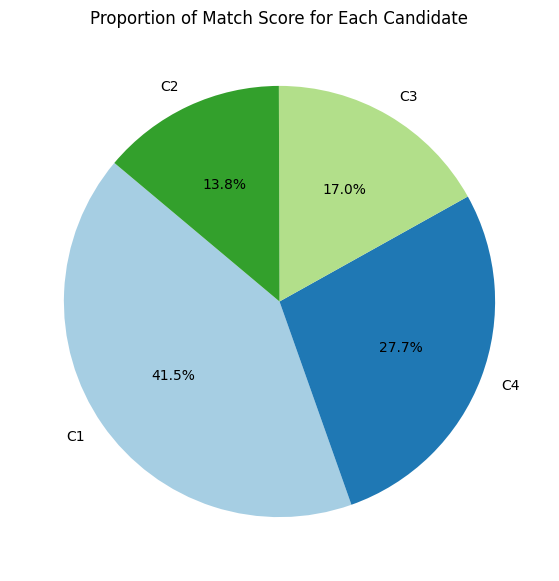

In [ ]:
import matplotlib.pyplot as plt

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(df['match_score'], labels=df['id'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(df))))
plt.title('Proportion of Match Score for Each Candidate')
plt.show()


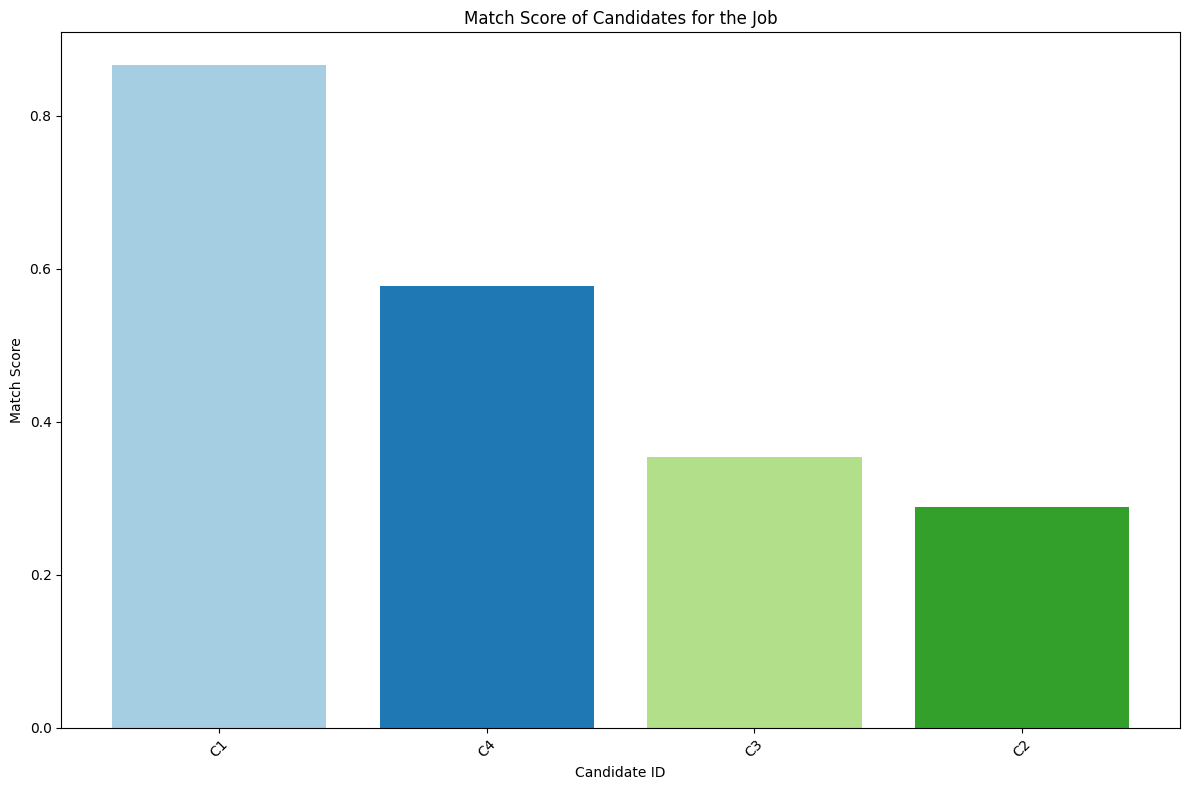

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(df['id'].astype(str), df['match_score'], color=plt.cm.Paired(range(len(df))))
plt.xlabel('Candidate ID')
plt.ylabel('Match Score')
plt.title('Match Score of Candidates for the Job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

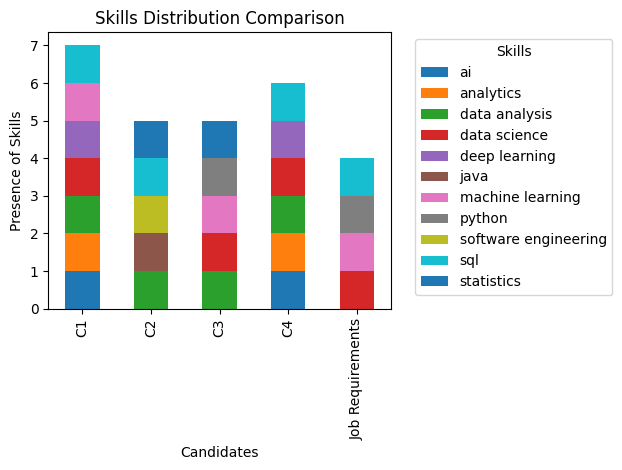

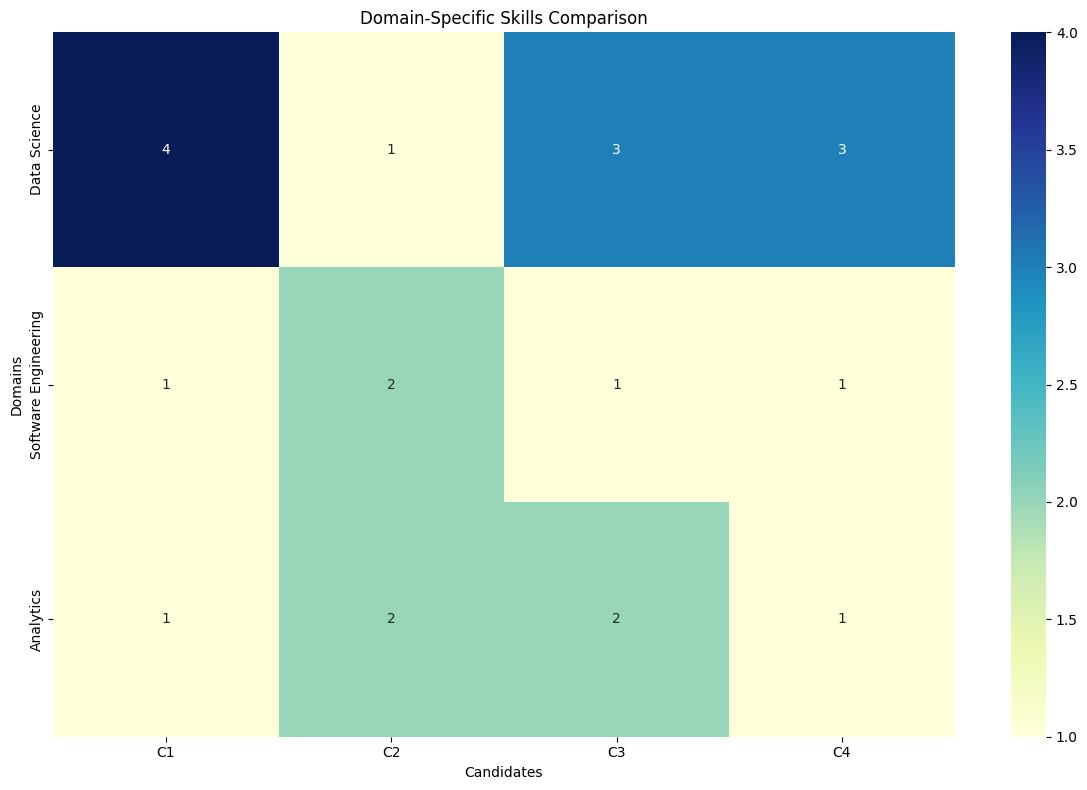

In [ ]:

# Prepare data for visualization
skills_list = vectorizer.get_feature_names_out()
skills_df = pd.DataFrame(skill_vectors.toarray()[:-1], columns=skills_list, index=df['id'])

# Add job requirements to the skills dataframe
job_skills_df = pd.DataFrame(skill_vectors[-1].toarray(), columns=skills_list, index=['Job Requirements'])
skills_df = pd.concat([skills_df, job_skills_df])

# Plotting the skill distribution comparison
plt.figure(figsize=(12, 8))
skills_df.plot(kind='bar', stacked=True)
plt.title('Skills Distribution Comparison')
plt.xlabel('Candidates')
plt.ylabel('Presence of Skills')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Define domains and skills
domains = {
    "Data Science": ["Machine Learning", "Data Science", "Deep Learning", "Python", "SQL"],
    "Software Engineering": ["Java", "Python", "SQL"],
    "Analytics": ["Data Analysis", "Statistics"]
}

# Create a DataFrame for domain-specific skills
domain_skills_df = pd.DataFrame(index=df['id'])

for domain, skills in domains.items():
    domain_skills_df[domain] = [sum(skill in skills for skill in skills_row.split(', '))
                                for skills_row in df['inferred_skills']]

# Adding job domain skills
job_domain_skills = pd.Series({
    domain: sum(skill in skills for skill in job_requirements.split(', '))
    for domain, skills in domains.items()
}, name='Job Requirements')

# Replace NaN values with zeroes and ensure all values are integers
domain_skills_df = domain_skills_df.fillna(0).astype(int)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(domain_skills_df.T, annot=True, cmap='YlGnBu', fmt='d')  # Use 'd' for integers
plt.title('Domain-Specific Skills Comparison')
plt.xlabel('Candidates')
plt.ylabel('Domains')
plt.tight_layout()
plt.show()

